In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [2]:
census=pd.read_csv('data/acs2015_county_data.csv')
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [3]:
census.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [4]:
census.isnull().sum(axis=0)

CensusId           0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [5]:
census=census.dropna()

In [6]:
cols=[c for c in census.columns.values if c not in ['CensusId', 'State', 'County']]

## K-Means

In [7]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4)
clusters=kmeans.fit(census[cols])

In [10]:
len(clusters.cluster_centers_)

4

In [11]:
clusters.cluster_centers_

array([[7.14995000e+05, 3.48954639e+05, 3.66040361e+05, 1.67854430e+01,
        6.02544304e+01, 1.41050633e+01, 3.38607595e-01, 5.71392405e+00,
        1.68354430e-01, 4.95983386e+05, 6.12043038e+04, 8.54474684e+02,
        3.16039367e+04, 3.98056962e+02, 1.41791139e+01, 1.99753165e+01,
        3.92006329e+01, 1.76835443e+01, 2.45822785e+01, 8.00569620e+00,
        1.05272152e+01, 7.64436709e+01, 9.11392405e+00, 5.50126582e+00,
        2.59430380e+00, 1.83607595e+00, 4.50379747e+00, 2.63639241e+01,
        3.41134006e+05, 8.07563291e+01, 1.36443038e+01, 5.46392405e+00,
        1.39240506e-01, 8.22974684e+00],
       [4.86137678e+04, 2.40621967e+04, 2.45515711e+04, 1.05567434e+01,
        7.64794408e+01, 8.35263158e+00, 1.80161184e+00, 9.32302632e-01,
        6.60197368e-02, 3.59949480e+04, 4.52585901e+04, 2.96736349e+03,
        2.35332332e+04, 1.41598651e+03, 1.76663816e+01, 2.44105263e+01,
        3.05263158e+01, 1.83702632e+01, 2.20742434e+01, 1.29949671e+01,
        1.60345066e+01,

In [16]:
preds=clusters.fit_predict(census[cols])
len(preds)

3218

In [17]:
distancias=clusters.fit_transform(census[cols])
len(distancias)

3218

In [18]:
import numpy as np

distancias[np.where(preds==1)[0]]

array([[ 5810320.38812675,  2106406.00976323,  8588496.98197191,
         4820695.36528671],
       [ 4476102.6537771 ,   772570.30820241,  9917118.44212282,
         3487047.05948377],
       [ 3214872.20101582,   513144.88932824, 11180977.9607949 ,
         2227802.42053226],
       [ 2917583.7319852 ,   803143.61151026, 11478171.47094131,
         1931074.32185437],
       [ 4650395.08966534,   949401.92658742,  9747031.09016275,
         3660815.51446326],
       [ 2639780.96926729,  1071684.93830065, 11753365.28587231,
         1652317.06398755],
       [ 2638751.07205886,  1068460.78265703, 11754836.98165016,
         1649246.11696707],
       [ 3698090.03048671,   142440.43241204, 10694584.7804203 ,
         2711662.69855657],
       [ 7638429.78822233,  3934192.92636933,  6766975.69819643,
         6648592.96931615],
       [ 2552577.53351075,  1178691.48062282, 11853030.30945281,
         1566122.04392865],
       [ 2896092.11175083,   811324.81306603, 11497340.39330611,
     

In [20]:
census['cluster']=preds
census.cluster.unique()

array([0, 2, 1, 3])

In [21]:
census[census.cluster==2]

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cluster
36,1073,Alabama,Jefferson,659026,311581,347445,3.8,51.0,42.2,0.2,...,1.0,2.5,23.6,293202,80.9,14.4,4.6,0.2,9.1,2
48,1097,Alabama,Mobile,414251,198216,216035,2.6,58.1,35.0,0.6,...,0.8,3.7,24.4,170900,81.4,13.8,4.6,0.1,9.8,2
106,4019,Arizona,Pima,998537,491108,507429,35.7,53.7,3.3,2.4,...,3.7,4.6,24.4,422371,74.9,18.3,6.6,0.2,10.0,2
170,5119,Arkansas,Pulaski,390463,187292,203171,5.9,54.2,35.4,0.3,...,1.1,2.9,20.3,180430,74.6,20.6,4.7,0.2,7.5,2
186,6001,California,Alameda,1584983,776699,808284,22.6,33.0,11.3,0.3,...,3.5,5.6,30.7,778132,78.7,13.8,7.4,0.1,8.3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,53061,Washington,Snohomish,746653,374847,371806,9.5,72.5,2.5,0.9,...,1.6,5.1,30.6,367655,81.6,12.7,5.5,0.2,7.5,2
2984,53063,Washington,Spokane,480832,238241,242591,5.1,85.7,1.7,1.3,...,1.6,5.4,21.2,211522,78.4,15.5,6.0,0.2,8.4,2
3059,55025,Wisconsin,Dane,510198,252850,257348,6.2,80.8,5.0,0.2,...,3.5,4.6,21.0,287151,74.2,21.1,4.5,0.1,4.9,2
3087,55079,Wisconsin,Milwaukee,955939,461804,494135,14.0,53.2,26.1,0.5,...,1.5,3.0,22.5,445174,84.8,11.7,3.4,0.1,9.3,2


In [22]:
census[census.cluster==0].State.value_counts()

Texas             240
Georgia           155
Virginia          130
Kentucky          119
Missouri          112
Kansas            103
Iowa               98
North Carolina     97
Illinois           97
Nebraska           92
Tennessee          92
Indiana            90
Minnesota          84
Mississippi        82
Ohio               81
Michigan           78
Puerto Rico        78
Oklahoma           75
Arkansas           74
Wisconsin          69
South Dakota       66
Alabama            65
Louisiana          61
Colorado           59
Pennsylvania       58
Montana            56
West Virginia      55
North Dakota       53
Florida            53
New York           51
South Carolina     43
Idaho              43
California         37
Washington         34
Oregon             33
New Mexico         32
Alaska             29
Utah               27
Wyoming            23
Maryland           19
Maine              16
Nevada             15
Vermont            14
Arizona            13
New Jersey         10
New Hampsh

In [23]:
census.groupby(['cluster']).Income.mean()

cluster
0    45258.590132
1    58589.894737
2    61204.303797
3    56196.000000
Name: Income, dtype: float64

## Hierarchical clustering

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
np.set_printoptions(precision=5, suppress=True)

In [30]:
np.random.seed(4711)

a=np.random.multivariate_normal([10, 0], [[3,1], [1,4]], size=[100,])
b=np.random.multivariate_normal([0, 20], [[3,1], [1,4]], size=[50,])

In [31]:
X=np.concatenate((a,b),)
X.shape

(150, 2)

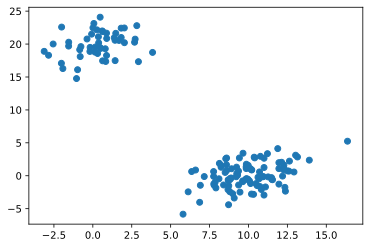

In [32]:
plt.scatter(X[:,0], X[:,1])
plt.show();

In [33]:
# matriz de conexion
Z=linkage(X, 'ward')
Z.shape

(149, 4)

In [34]:
Z[0] #[idx1, idx2, dist, sample_count]

array([52.     , 53.     ,  0.04151,  2.     ])

In [35]:
Z[:20]

array([[ 52.     ,  53.     ,   0.04151,   2.     ],
       [ 14.     ,  79.     ,   0.05914,   2.     ],
       [ 33.     ,  68.     ,   0.07107,   2.     ],
       [ 17.     ,  73.     ,   0.07137,   2.     ],
       [  1.     ,   8.     ,   0.07543,   2.     ],
       [ 85.     ,  95.     ,   0.10928,   2.     ],
       [108.     , 131.     ,   0.11007,   2.     ],
       [  9.     ,  66.     ,   0.11302,   2.     ],
       [ 15.     ,  69.     ,   0.11429,   2.     ],
       [ 63.     ,  98.     ,   0.1212 ,   2.     ],
       [107.     , 115.     ,   0.12167,   2.     ],
       [ 65.     ,  74.     ,   0.1249 ,   2.     ],
       [ 58.     ,  61.     ,   0.14028,   2.     ],
       [ 62.     , 152.     ,   0.1726 ,   3.     ],
       [ 41.     , 158.     ,   0.1779 ,   3.     ],
       [ 10.     ,  83.     ,   0.18635,   2.     ],
       [114.     , 139.     ,   0.20419,   2.     ],
       [ 39.     ,  88.     ,   0.20628,   2.     ],
       [ 70.     ,  96.     ,   0.21931,   2. 

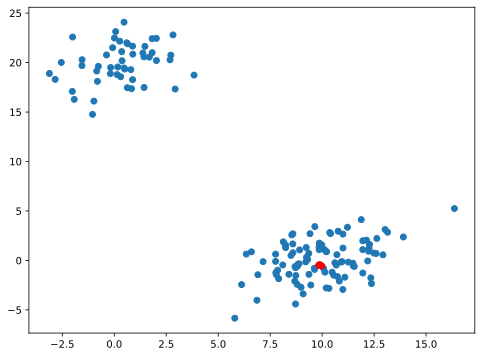

In [39]:
idx=[33, 68, 62]
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1]) # todos
plt.scatter(X[idx,0], X[idx,1], c='r')
plt.show();

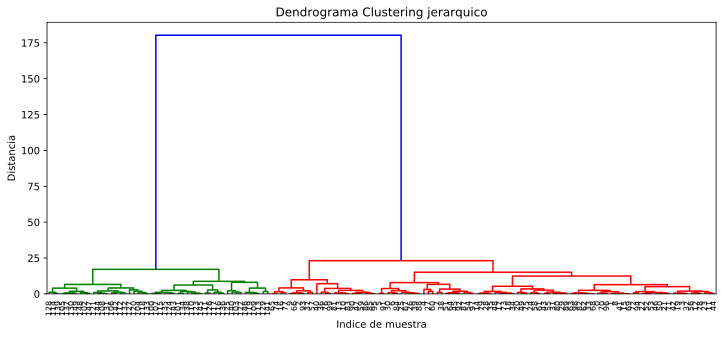

In [40]:
# dendrograma

plt.figure(figsize=(12,5))
plt.title('Dendrograma Clustering jerarquico')
plt.xlabel('Indice de muestra')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show();

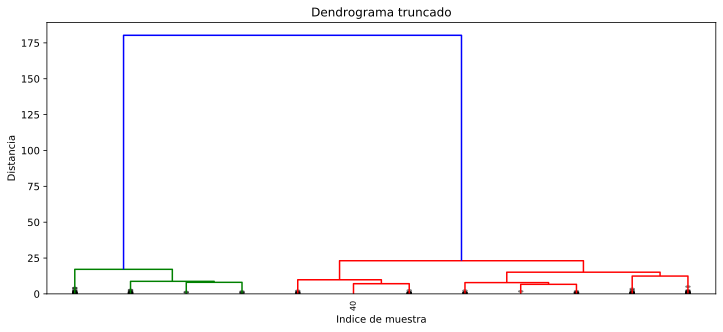

In [41]:
plt.figure(figsize=(12,5))
plt.title('Dendrograma truncado')
plt.xlabel('Indice de muestra')
plt.ylabel('Distancia')
dendrogram(Z, truncate_mode='lastp', p=12, show_leaf_counts=False, 
           leaf_rotation=90., leaf_font_size=8., show_contracted=True)
plt.show();

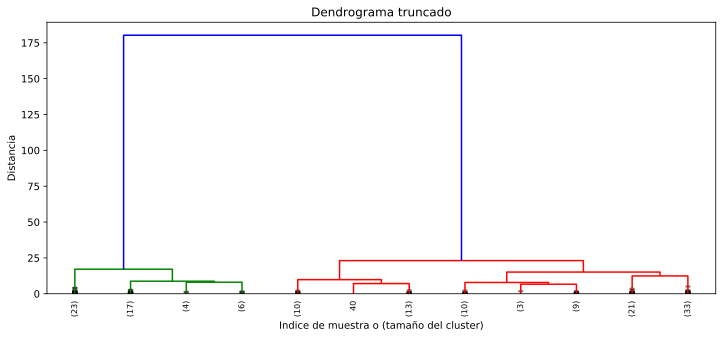

In [43]:
plt.figure(figsize=(12,5))
plt.title('Dendrograma truncado')
plt.xlabel('Indice de muestra o (tamaño del cluster)')
plt.ylabel('Distancia')
dendrogram(Z, truncate_mode='lastp', p=12,  
           leaf_rotation=90., leaf_font_size=8., show_contracted=True)
plt.show();

In [44]:
def fancy_dendro(*args, **kwargs):
    max_d=kwargs.pop('max_d', None)
    
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold']=max_d
        
    annotate_above=kwargs.pop('annotate_above', None)
    
    ddata=dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Dendrograma')
        plt.xlabel('Indice de muestra o (tamaño del cluster)')
        plt.ylabel('Distancia')
        
        for i,d,c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x=0.5*sum(i[1:3])
            y=d[1]
            
            if y>annotate_above:
                plt.plot(x,y,'o', c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),textcoords='offset points', va='top', ha='center')
                
        if max_d:
            plt.axhline(y=max_d, c='k')
    
    return ddata
    
    

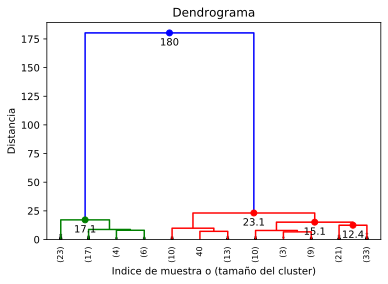

In [45]:
fancy_dendro(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=8.,
             show_contracted=True, annotate_above=10)
plt.show();

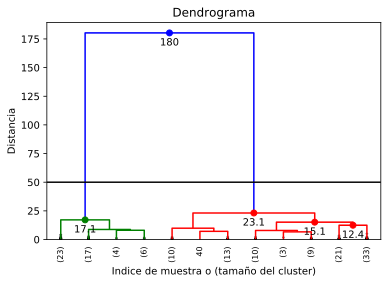

In [46]:
max_d=50

fancy_dendro(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=8.,
             show_contracted=True, annotate_above=10, max_d=max_d)
plt.show();

In [47]:
# obteniendo clusters

from scipy.cluster.hierarchy import fcluster

In [55]:
max_d=23.2
clusters=fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [61]:
k=2
clusters=fcluster(Z, k, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

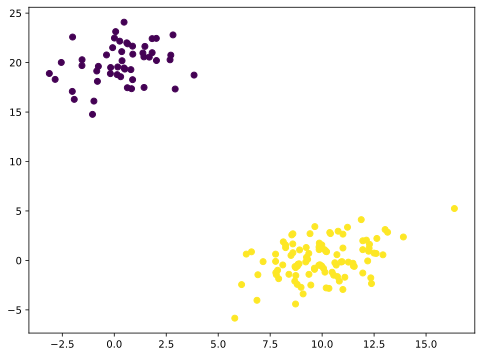

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=clusters) 
plt.show();

In [63]:
# k-means vs hierarchical clustering

from sklearn.datasets import make_moons

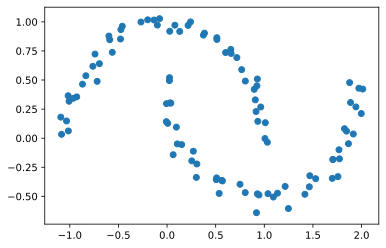

In [66]:
moons=make_moons(n_samples=100, shuffle=True, noise=0.05)[0]
plt.scatter(moons[:,0], moons[:,1]);

In [67]:
from sklearn.cluster import AgglomerativeClustering as AC

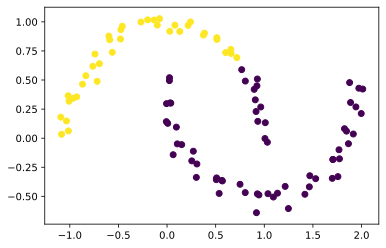

In [68]:
clustering=AC().fit(moons)
plt.scatter(moons[:,0], moons[:,1], c=clustering.labels_);

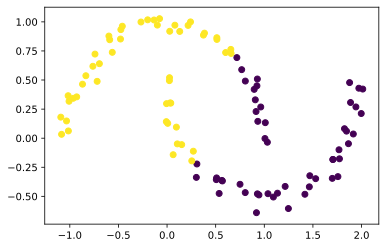

In [72]:

clustering=KMeans(n_clusters=2).fit(moons)
plt.scatter(moons[:,0], moons[:,1], c=clustering.labels_);

In [73]:
clustering.cluster_centers_

array([[ 1.21204, -0.07659],
       [-0.22526,  0.55513]])

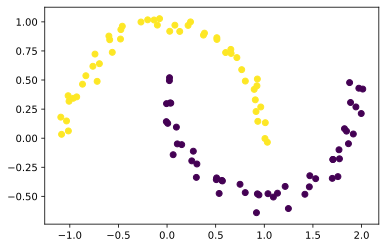

In [71]:
clustering=AC(linkage='single').fit(moons)
plt.scatter(moons[:,0], moons[:,1], c=clustering.labels_);

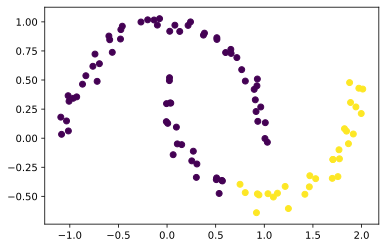

In [74]:
clustering=AC(linkage='complete').fit(moons)
plt.scatter(moons[:,0], moons[:,1], c=clustering.labels_);

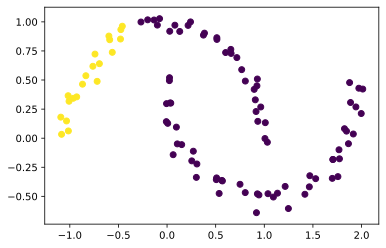

In [75]:
clustering=AC(linkage='average').fit(moons)
plt.scatter(moons[:,0], moons[:,1], c=clustering.labels_);